In [81]:
import pandas as pd
import numpy as np
import os
import platform
import sys
import sklearn
from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from pandas import DataFrame
print(f"- os: {platform.platform()}")
print(f"- python: {sys.version}")
print(f"- pandas: {pd.__version__}")
print(f"- numpy: {np.__version__}")
print(f"- sklearn: {sklearn.__version__}")

- os: Windows-10-10.0.19042-SP0
- python: 3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]
- pandas: 1.3.4
- numpy: 1.21.2
- sklearn: 1.0.1


In [82]:
train_dataset = pd.read_csv('C:/Users/wnrrh/Desktop/dacon/Jobcare_data/train.csv',index_col='id')
test_dataset = pd.read_csv('C:/Users/wnrrh/Desktop/dacon/Jobcare_data/test.csv',index_col='id')
ss = pd.read_csv('C:/Users/wnrrh/Desktop/dacon/Jobcare_data/sample_submission.csv',index_col='id')

In [83]:
attribute_d = pd.read_csv('C:/Users/wnrrh/Desktop/dacon/Jobcare_data/속성_D_코드.csv')
attribute_h = pd.read_csv('C:/Users/wnrrh/Desktop/dacon/Jobcare_data/속성_H_코드.csv')
attribute_l = pd.read_csv('C:/Users/wnrrh/Desktop/dacon/Jobcare_data/속성_L_코드.csv')

# Data Check

In [84]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501951 entries, 0 to 501950
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   d_l_match_yn            501951 non-null  bool  
 1   d_m_match_yn            501951 non-null  bool  
 2   d_s_match_yn            501951 non-null  bool  
 3   h_l_match_yn            501951 non-null  bool  
 4   h_m_match_yn            501951 non-null  bool  
 5   h_s_match_yn            501951 non-null  bool  
 6   person_attribute_a      501951 non-null  int64 
 7   person_attribute_a_1    501951 non-null  int64 
 8   person_attribute_b      501951 non-null  int64 
 9   person_prefer_c         501951 non-null  int64 
 10  person_prefer_d_1       501951 non-null  int64 
 11  person_prefer_d_2       501951 non-null  int64 
 12  person_prefer_d_3       501951 non-null  int64 
 13  person_prefer_e         501951 non-null  int64 
 14  person_prefer_f         501951 non-n

In [85]:
train_dataset

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
id,,,,,,,,,,,,,,,,,,,,,
0,True,True,True,False,False,False,1,4,3,5,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,False,False,False,True,True,False,1,3,4,1,...,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,False,False,False,True,False,False,2,0,3,5,...,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,False,False,False,True,False,False,2,0,2,5,...,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,True,True,True,False,False,False,1,3,4,5,...,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,False,False,False,True,False,False,1,1,2,2,...,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1
501947,True,True,False,True,False,False,1,6,2,1,...,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1
501948,True,True,True,True,False,False,1,7,4,1,...,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1


In [86]:
# 결측치 확인
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

miss_train = check_missing_col(train_dataset)
print(miss_train)
miss_test = check_missing_col(test_dataset)
print(miss_test)

결측치가 존재하지 않습니다
[]
결측치가 존재하지 않습니다
[]


In [87]:
train_dataset.select_dtypes('int64').apply(pd.Series.nunique, axis=0)

person_attribute_a             2
person_attribute_a_1           8
person_attribute_b             6
person_prefer_c                5
person_prefer_d_1           1093
person_prefer_d_2           1081
person_prefer_d_3           1043
person_prefer_e               12
person_prefer_f                1
person_prefer_g                1
person_prefer_h_1            279
person_prefer_h_2            279
person_prefer_h_3            279
contents_attribute_i           3
contents_attribute_a           3
contents_attribute_j_1         9
contents_attribute_j           2
contents_attribute_c           4
contents_attribute_k           2
contents_attribute_l        1752
contents_attribute_d        1065
contents_attribute_m           5
contents_attribute_e          12
contents_attribute_h         250
person_rn                 300177
contents_rn               283359
target                         2
dtype: int64

person_prefer_f,person_prefer_g는 의미 없는 컬럼임을 확인

In [88]:
train_dataset = train_dataset.drop(['person_prefer_f','person_prefer_g'],axis=1)
test_dataset = test_dataset.drop(['person_prefer_f','person_prefer_g'],axis=1)

In [89]:
# 주어진 속성 D,H,L 코드 컬럼 명 변환
attribute_d.columns = ['attribute_d', 'attribute_d_n','attribute_d_s','attribute_m','attribute_l']
attribute_h.columns = ['attribute_h','attribute_h_m','attribute_h_l']
attribute_l.columns = ['attribute_l','attribute_l_n','attribute_l_s','attribute_l_m','attribute_l_l']

In [90]:
# person/contents 속성 컬럼 정리
attribute_a = ['person_attribute_a','person_attribute_a_1']
person_attribute = ['person_attribute_a','person_attribute_a_1','person_attribute_b']
person_prefer = ['person_prefer_c','person_prefer_d_1','person_prefer_d_2','person_prefer_d_3',
                'person_prefer_e','person_prefer_f','person_prefer_g','person_prefer_h_1',
                'person_prefer_h_2','person_prefer_h_3']
person_prefer_h = ['person_prefer_h_1','person_prefer_h_2','person_prefer_h_3']
person_prefer_d = ['person_prefer_d_1','person_prefer_d_2','person_prefer_d_3']
contents_attribute = ['contents_attribute_i','contents_attribute_a','contents_attribute_j_1',
                     'contents_attribute_j','contents_attribute_c','contents_attribute_k',
                     'contents_attribute_l','contents_attribute_d','contents_attribute_m',
                     'contents_attribute_e','contents_attribute_h']
attribute_j = ['contents_attribute_j','contents_attribute_j_1']

In [101]:
li = [train_dataset['person_attribute_a'], train_dataset['person_attribute_a_1']]
li

[id
 0         1
 1         1
 2         2
 3         2
 4         1
          ..
 501946    1
 501947    1
 501948    1
 501949    1
 501950    1
 Name: person_attribute_a, Length: 501951, dtype: int64,
 id
 0         4
 1         3
 2         0
 3         0
 4         3
          ..
 501946    1
 501947    6
 501948    7
 501949    1
 501950    6
 Name: person_attribute_a_1, Length: 501951, dtype: int64]

In [98]:
li_a = pd.DataFrame(li, columns = attribute_a)

ValueError: 2 columns passed, passed data had 501951 columns

In [54]:
train_dataset

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
id,,,,,,,,,,,,,,,,,,,,,
0,True,True,True,False,False,False,1,4,3,5,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,False,False,False,True,True,False,1,3,4,1,...,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,False,False,False,True,False,False,2,0,3,5,...,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,False,False,False,True,False,False,2,0,2,5,...,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,True,True,True,False,False,False,1,3,4,5,...,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,False,False,False,True,False,False,1,1,2,2,...,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1
501947,True,True,False,True,False,False,1,6,2,1,...,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1
501948,True,True,True,True,False,False,1,7,4,1,...,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1


# 전처리

In [50]:
train = pd.get_dummies(train_dataset,columns = ['person_attribute_a'])

MemoryError: Unable to allocate 228. GiB for an array with shape (494952, 494952) and data type uint8

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501951 entries, 0 to 501950
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   d_l_match_yn            501951 non-null  bool  
 1   d_m_match_yn            501951 non-null  bool  
 2   d_s_match_yn            501951 non-null  bool  
 3   h_l_match_yn            501951 non-null  bool  
 4   h_m_match_yn            501951 non-null  bool  
 5   h_s_match_yn            501951 non-null  bool  
 6   person_attribute_a      501951 non-null  int64 
 7   person_attribute_a_1    501951 non-null  int64 
 8   person_attribute_b      501951 non-null  int64 
 9   person_prefer_c         501951 non-null  int64 
 10  person_prefer_d_1       501951 non-null  int64 
 11  person_prefer_d_2       501951 non-null  int64 
 12  person_prefer_d_3       501951 non-null  int64 
 13  person_prefer_e         501951 non-null  int64 
 14  person_prefer_h_1       501951 non-n

# EDA 시각화

종속변수 분포 개수: 0    251106
1    250845
Name: target, dtype: int64


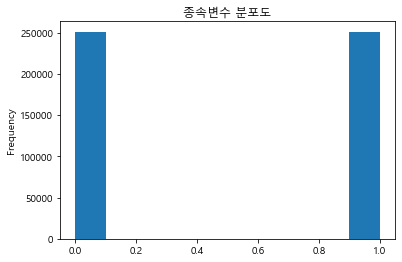

In [66]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
train_dataset['target'].plot.hist(title = '종속변수 분포도')
print("종속변수 분포 개수:", train_dataset['target'].value_counts())

In [ ]:
# 